In [ ]:
# Lens distortion testing and then undistorting
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html
# The second mtx in the undistort function can be used to change the centre and direction of the camera 
# if it is not mounted centrally
# roi can be used to select the good part of the image, but sometimes it returns 0

In [10]:
import cv2, numpy

video_file = "/home/julian/Videos/avianskullchessboard.MOV"

pattern_size = (8, 6)
square_size = float(1.0)
pattern_points = numpy.zeros((numpy.prod(pattern_size), 3), numpy.float32)
pattern_points[:,:2] = numpy.indices(pattern_size).T.reshape(-1, 2)
pattern_points *= square_size

obj_points = []
img_points = []
h, w = 0, 0

cap = cv2.VideoCapture(video_file)


In [11]:
print("nframes", cap.get(cv2.CAP_PROP_FRAME_COUNT))
interleave = cap.get(cv2.CAP_PROP_FRAME_COUNT) // 44
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
print("analyzing video")
nextframe = 0
frames = [ ]
while cap.get(cv2.CAP_PROP_POS_FRAMES) < cap.get(cv2.CAP_PROP_FRAME_COUNT):
    flag, frame = cap.read()
    # The frame is ready and already captured
    pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    if pos_frame >= nextframe:
        cv2.waitKey(10)  # necessary for the cv2.imshow() to work
        img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        print("frame: ", pos_frame)
        h, w = img.shape[:2]
        frames.append(frame)
        found, corners = cv2.findChessboardCorners(img, pattern_size)
        nextframe += interleave
        if found:
            cv2.drawChessboardCorners(frame, pattern_size, corners, found) 
            #sml = cv2.resize(frame, (w//2,h//2))
            cv2.imshow('video', frame)
            term = ( cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 0.1 )
            cv2.cornerSubPix(img, corners, (5, 5), (-1, -1), term)
            img_points.append(corners.reshape(-1, 2))
            obj_points.append(pattern_points)

        else:
            print('chessboard not found')

cv2.destroyAllWindows()
len(frames)

nframes 2504.0
analyzing video
frame:  1.0
chessboard not found
frame:  56.0
frame:  112.0
frame:  168.0
frame:  224.0
frame:  280.0
chessboard not found
frame:  336.0
chessboard not found
frame:  392.0
frame:  448.0
frame:  504.0
frame:  560.0
frame:  616.0
frame:  672.0
frame:  728.0
frame:  784.0
frame:  840.0
frame:  896.0
frame:  952.0
frame:  1008.0
frame:  1064.0
frame:  1120.0
frame:  1176.0
chessboard not found
frame:  1232.0
frame:  1288.0
frame:  1344.0
frame:  1400.0
frame:  1456.0
frame:  1512.0
frame:  1568.0
frame:  1624.0
frame:  1680.0
frame:  1736.0
frame:  1792.0
frame:  1848.0
frame:  1904.0
frame:  1960.0
frame:  2016.0
frame:  2072.0
frame:  2128.0
frame:  2184.0
frame:  2240.0
frame:  2296.0
frame:  2352.0
frame:  2408.0
frame:  2464.0


45

In [12]:
# this can take a long time (sometimes)
#cv2.fisheye.calibrate(objpoints, imgpoints, (w, h), None, None)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, (w, h), None, None)
mtx, dist

(array([[9.90618474e+02, 0.00000000e+00, 6.53572956e+02],
        [0.00000000e+00, 1.00755969e+03, 3.67872669e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.57453909,  0.42458431, -0.01814159, -0.00694322, -0.17175265]]))

In [13]:
mtx, dist

(array([[9.90618474e+02, 0.00000000e+00, 6.53572956e+02],
        [0.00000000e+00, 1.00755969e+03, 3.67872669e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.57453909,  0.42458431, -0.01814159, -0.00694322, -0.17175265]]))

In [14]:
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 0, (w,h))
print(roi, newcameramtx)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
#x,y,lw,lh = roi
#plt.imshow(cv2.cvtColor(dst[y:y+lh, x:x+lw], cv2.COLOR_BGR2RGB))


(0, 0, 0, 0) [[-628.55316162    0.         -551.76430092]
 [   0.         -525.34655762 -203.15422469]
 [   0.            0.            1.        ]]


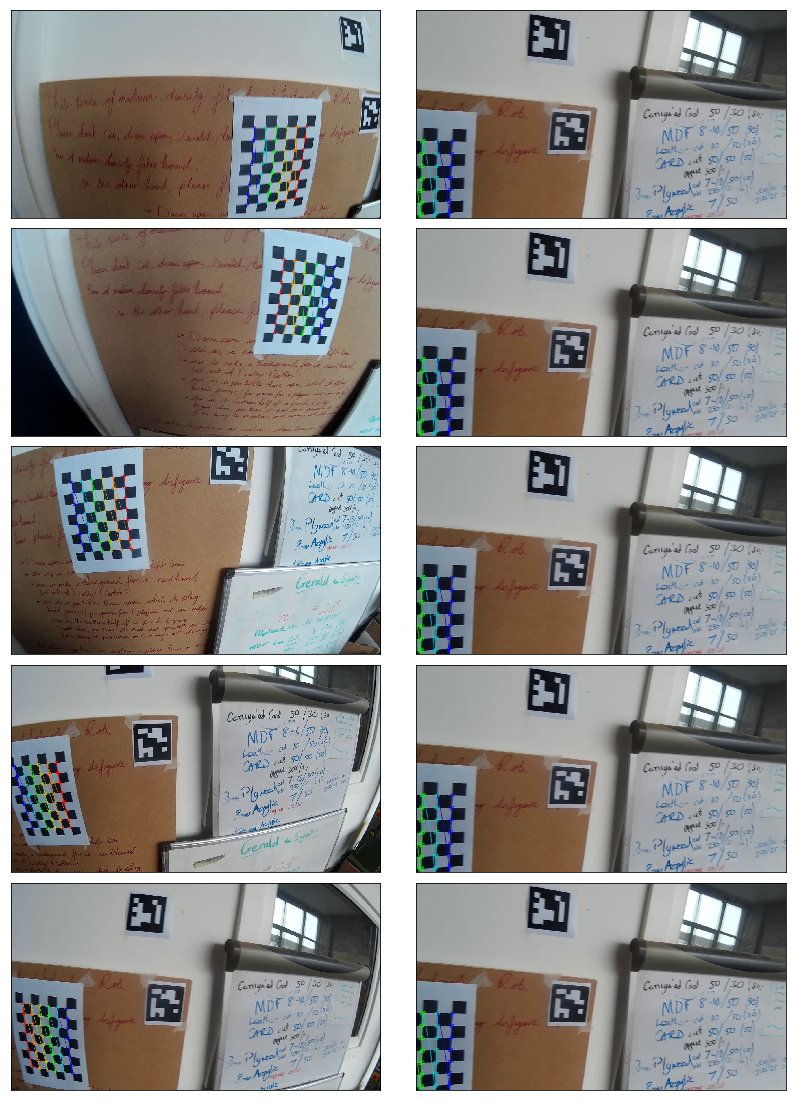

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, mtx, (w,h), 5)

plt.figure(figsize=(11,15))
iframes = [3, 10, 15, 20, 23]
for i in range(len(iframes)):
    frame = frames[iframes[i]]
    fframe = cv2.undistort(frame, mtx, dist, None, mtx)
    fframe = cv2.remap(frame, mapx, mapy, cv2.INTER_LINEAR)
    plt.subplot(len(iframes),2,i*2+1)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.subplot(len(iframes),2,i*2+2)
    plt.imshow(cv2.cvtColor(fframe2, cv2.COLOR_BGR2RGB))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    
plt.subplots_adjust(0,0,1,1,0.05,0.05)
plt.savefig("ch.jpg")

In [63]:
cv2.undistort?

Docstring:
undistort(src, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) -> dst
.   @brief Transforms an image to compensate for lens distortion.
.   
.   The function transforms an image to compensate radial and tangential lens distortion.
.   
.   The function is simply a combination of #initUndistortRectifyMap (with unity R ) and #remap
.   (with bilinear interpolation). See the former function for details of the transformation being
.   performed.
.   
.   Those pixels in the destination image, for which there is no correspondent pixels in the source
.   image, are filled with zeros (black color).
.   
.   A particular subset of the source image that will be visible in the corrected image can be regulated
.   by newCameraMatrix. You can use #getOptimalNewCameraMatrix to compute the appropriate
.   newCameraMatrix depending on your requirements.
.   
.   The camera matrix and the distortion parameters can be determined using #calibrateCamera. If
.   the resolution of images is 

In [73]:
cv2.findChessboardCornersSB?

Docstring:
findChessboardCornersSB(image, patternSize[, corners[, flags]]) -> retval, corners
.   @brief Finds the positions of internal corners of the chessboard using a sector based approach.
.   
.   @param image Source chessboard view. It must be an 8-bit grayscale or color image.
.   @param patternSize Number of inner corners per a chessboard row and column
.   ( patternSize = cv::Size(points_per_row,points_per_colum) = cv::Size(columns,rows) ).
.   @param corners Output array of detected corners.
.   @param flags Various operation flags that can be zero or a combination of the following values:
.   -   **CALIB_CB_NORMALIZE_IMAGE** Normalize the image gamma with equalizeHist before detection.
.   -   **CALIB_CB_EXHAUSTIVE ** Run an exhaustive search to improve detection rate.
.   -   **CALIB_CB_ACCURACY ** Up sample input image to improve sub-pixel accuracy due to aliasing effects.
.   This should be used if an accurate camera calibration is required.
.   
.   The function is anal

In [78]:
[ f  for f in dir(cv2) if "apr" in f.lower()]

['PCAProject', 'TonemapReinhard', 'createTonemapReinhard']